In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import IPython
import librosa
import seaborn as sns

# Part 1: Building The Fast Fourier Transform

## Part B: Implementing the Discrete Fourier Transform

In [ ]:
# part 1b
def my_FT(x):
    x = np.asarray(x)
    n = x.shape[0]
    j = np.arange(n)
    k = j.reshape((n, 1))
    M = (np.exp(-2j * np.pi/ n))**(j*k)
    return np.dot(M, x)

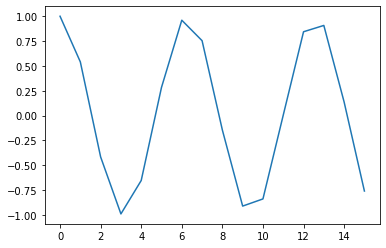

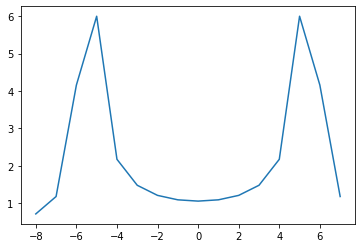

In [ ]:
# verfiying that the transform is correct with some well known fourier shapes
a = np.cos(np.arange(0, 16, 1))
fourier_transform = my_FT(a)

plt.plot(np.arange(0, 16), a)
plt.show()
plt.plot(np.arange(-8, 8, 1), np.abs(fourier_transform))

## Part C: Implementing the Fast Fourier Transform

In [ ]:
# part 1c
def my_FFT(x):
    N = int(x.shape[0])
    if N <= 2:  # switch to DFT
        return my_FT(x)
    else:
        X_even = my_FFT(x[::2])
        X_odd = my_FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:(N // 2)] * X_odd,
                               X_even + factor[(N // 2):] * X_odd])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


True

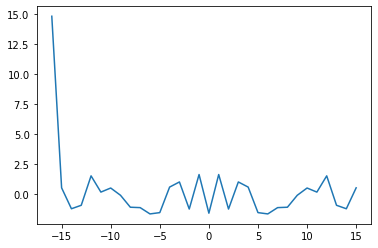

In [ ]:
x = np.random.random(32)
plt.plot(np.arange(-16, 16), my_FFT(x))
np.allclose(my_FFT(x), np.fft.fft(x))

## Part D: Looking At The Speedup

We use IPython's %%time magic to time the execution of both my_FFT and my_DFT. Our solution assssssymptotic speedup


In [ ]:
import time

times_FFT = []
for i in 2**np.arange(1, 14):
  a = np.random.randn(i)
  start = time.time()
  my_FFT(a)
  delta = time.time() - start
  times_FFT.append(delta)

In [ ]:
times_DFT = []
for i in 2**np.arange(1, 14):
  a = np.random.randn(i)
  start = time.time()
  my_FT(a)
  delta = time.time() - start
  times_DFT.append(delta)

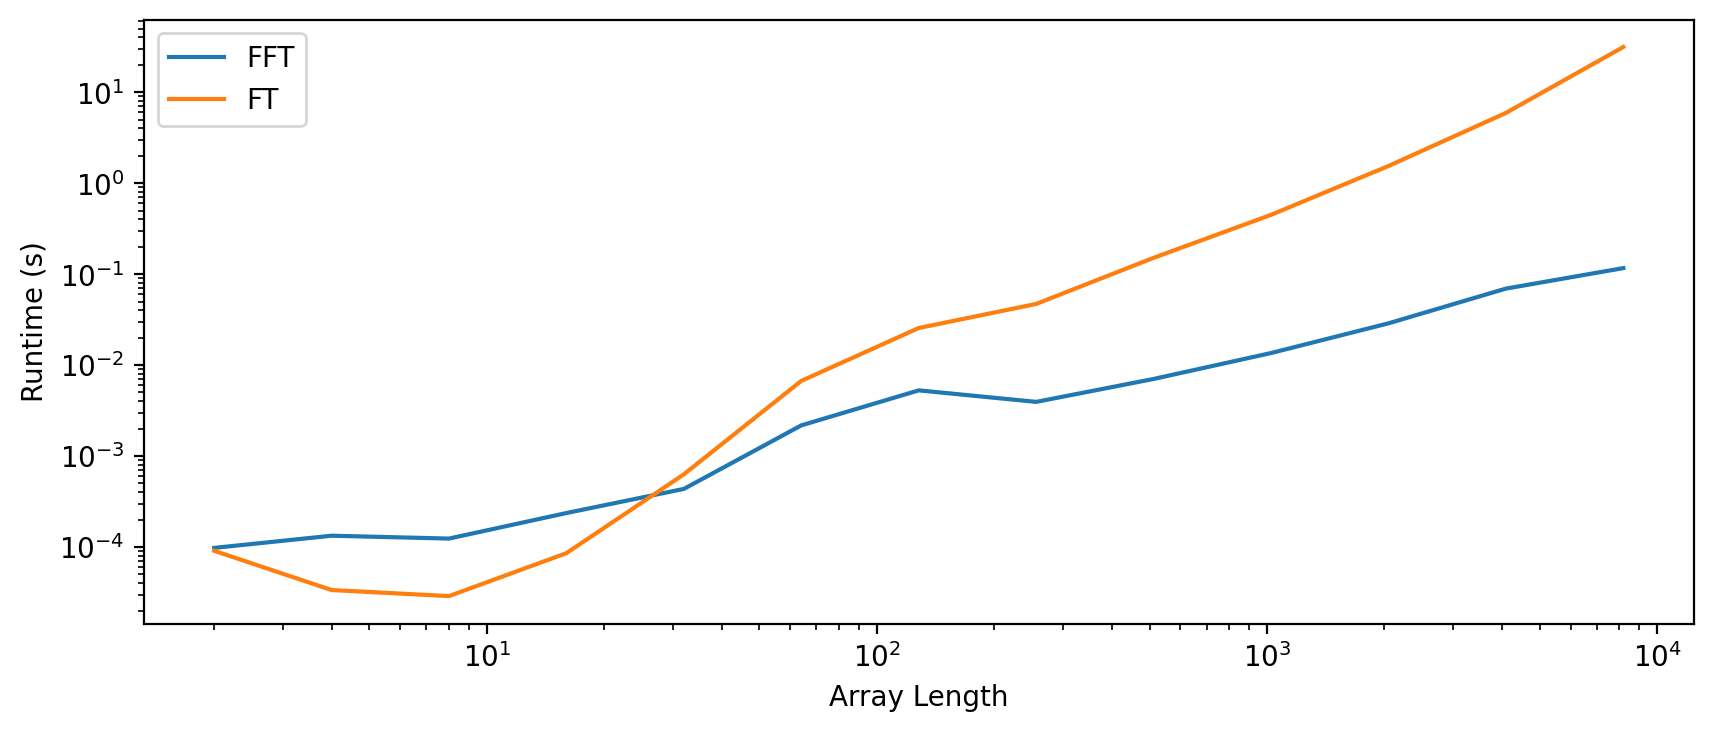

In [ ]:
figure(figsize=(10, 4), dpi=200)


plt.plot(2**np.arange(1, 14), times_FFT, label="FFT")
plt.plot(2**np.arange(1, 14), times_DFT, label="FT")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Array Length")
plt.ylabel("Runtime (s)")
plt.legend()

# Part 2: The \*Mel-Spectrogram\*



## Part B: Record and Save a voice clip

In [ ]:
duration = 20
audio, sr = librosa.load("sample.wav", duration=duration)

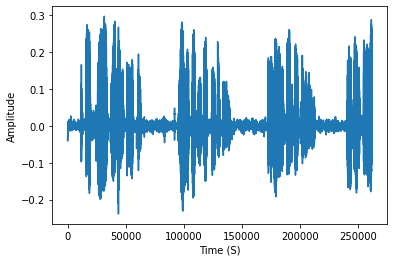

In [ ]:
x = np.linspace(0, duration, sr*duration)
plt.plot(audio)
plt.ylabel("Amplitude")
plt.xlabel("Time (S)")
plt.show()

## Part B: Baby's First Spectrogram

In [ ]:
audio = audio[:2**18]
import soundfile as sf

sf.write("sample2.wav", audio, sr)

In [ ]:
def sliding_fourier(wav_file, hop_size=256, freq_cutoff=100):
  length = wav_file.shape[0]
  window_size = 512
  end = hop_size * round(length / hop_size) - window_size
  anchors = np.linspace(0, end, end // hop_size, endpoint=False, dtype=int)
  spectrogram = []
  for start in anchors:
    window = wav_file[start : start + window_size]
    fouriers = my_FFT(window)
    fouriers = 2 * fouriers[-freq_cutoff:]
    spectrogram.append(np.abs(fouriers))
  correct_spect = np.asarray(spectrogram, dtype="float").T
  return correct_spect

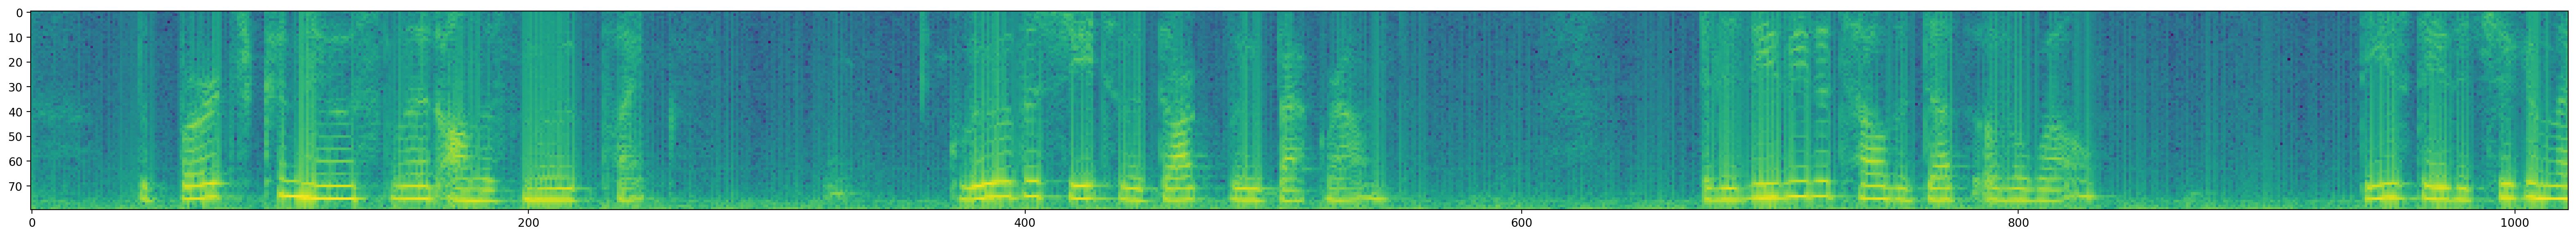

In [ ]:
spectrogram = sliding_fourier(audio, freq_cutoff=80)

figure(figsize=(40, 6), dpi=200)

plt.imshow(np.log(spectrogram))
plt.show()

## Part D: Hamming To The Rescue

In [ ]:
def sliding_fourier_hamm(wav_file, hop_size=256, freq_cutoff=100):
  length = wav_file.shape[0]
  window_size = 512
  end = hop_size * round(length / hop_size) - window_size
  anchors = np.linspace(0, end, end // hop_size, endpoint=False, dtype=int)
  spectrogram = []
  hamm = np.hamming(window_size)
  for start in anchors:
    window = wav_file[start : start + window_size] * hamm
    fouriers = my_FFT(window)
    fouriers = 2 * fouriers[-freq_cutoff:]
    spectrogram.append(np.abs(fouriers))
  correct_spect = np.asarray(spectrogram, dtype="float").T
  return correct_spect

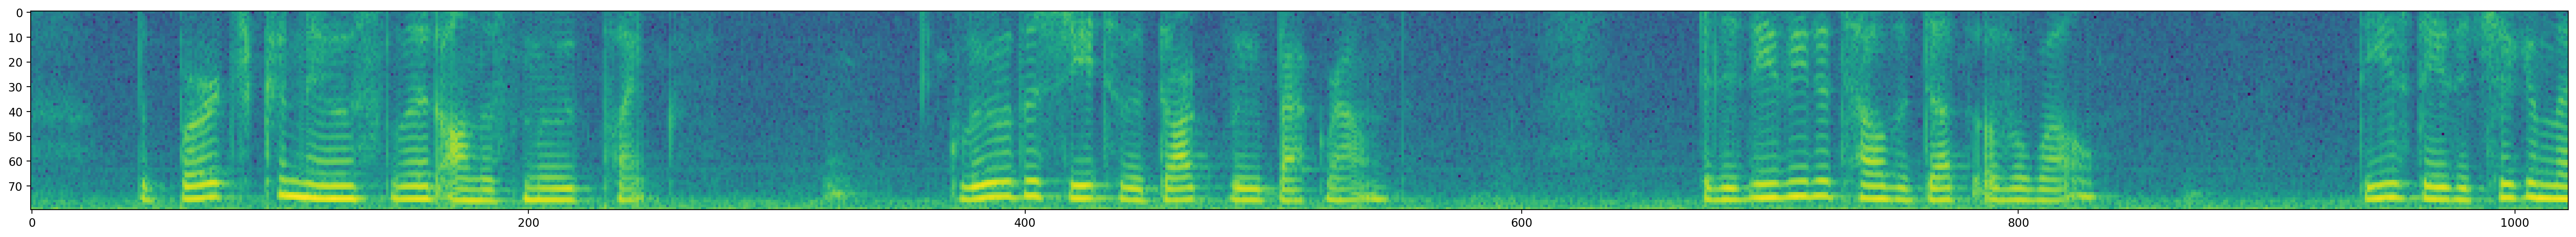

In [ ]:
spectrogram = sliding_fourier_hamm(audio, freq_cutoff=80)

figure(figsize=(40, 6), dpi=200)

plt.imshow(np.log(spectrogram))
plt.show()

# Part 3: Understanding Bird Calls

## Part B: Getting Waveforms

In [ ]:
def load_plot_audio(filename, cutoff, title):
    y, sr = librosa.load(filename)
    plt.figure(figsize=(10,8))
    plt.title(f"Waveform of {title}")
    plt.plot(y[:cutoff])
    return y[:cutoff], sr

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


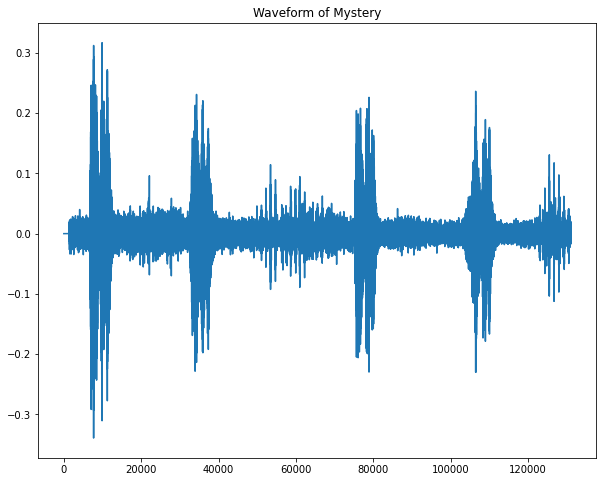

In [ ]:
y_m, sr_m = load_plot_audio('mystery.mp3', 131072, "Mystery")

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


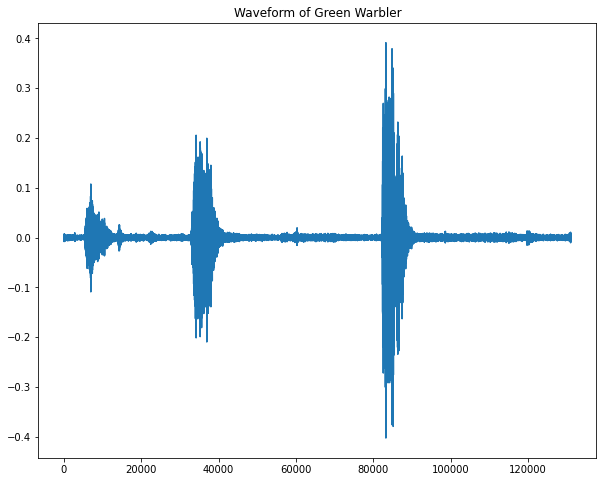

In [ ]:
y_gw, sr_gw = load_plot_audio('green_warbler.mp3', 131072, "Green Warbler")

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


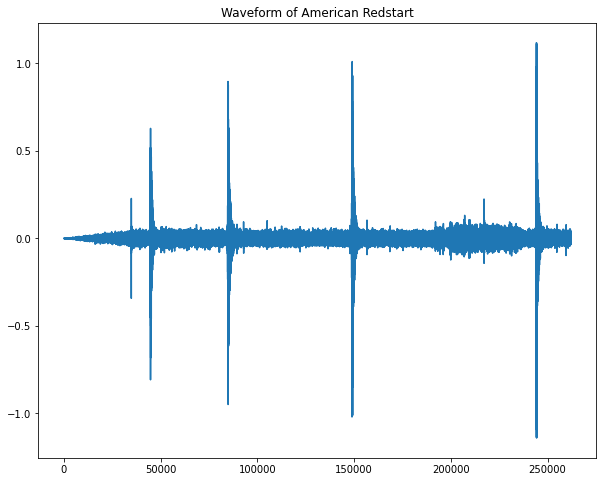

In [ ]:
y_h, sr_h = load_plot_audio('american_redstart.mp3', 262144, "American Redstart")

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


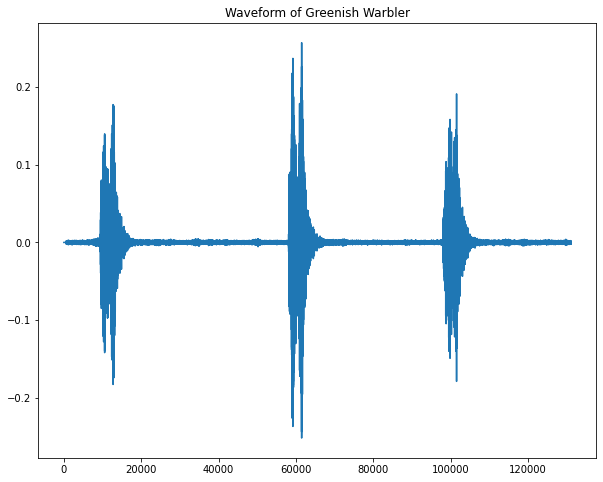

In [ ]:
y_iw, sr_iw = load_plot_audio('greenish_warbler.mp3', 131072, "Greenish Warbler")

## Part C: FFT Strikes Again

In [ ]:
def plot_fourier(y, title):
    y_fft = my_FFT(y)
    fft_coeff_mag = np.sqrt(np.power(np.real(y_fft), 2) + np.power(np.imag(y_fft), 2))

    plt.figure(figsize=(10,8))
    sns.lineplot(x=list(range(len(fft_coeff_mag))), y=np.real(fft_coeff_mag))

    plt.xlabel("frequency bins")
    plt.ylabel("magnitude of each Fourier coefficient")
    plt.title(f"Fourier Transform of {title}")


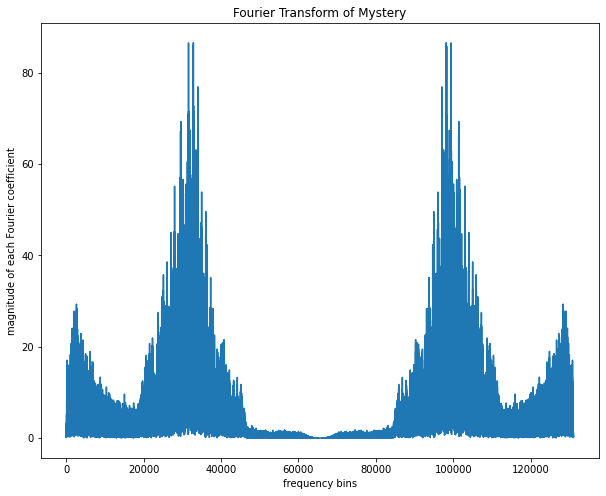

In [ ]:
plot_fourier(y_m, "Mystery")

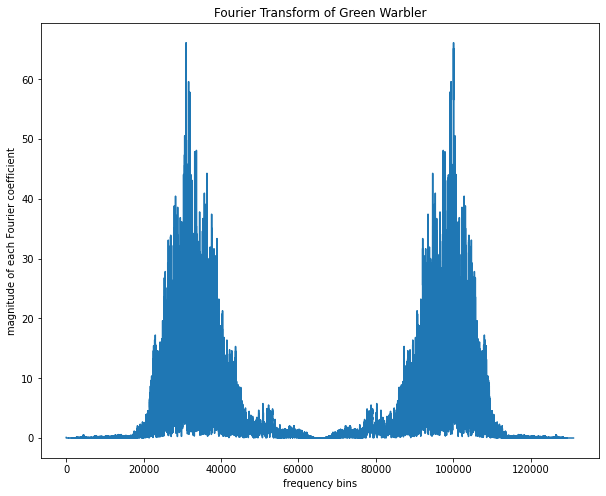

In [ ]:
plot_fourier(y_gw, "Green Warbler")

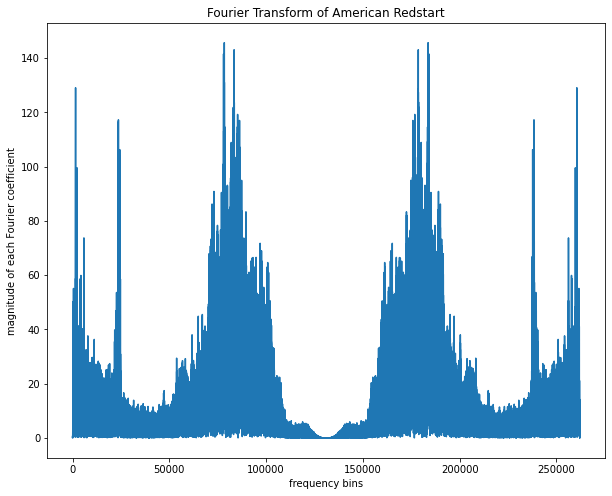

In [ ]:
plot_fourier(y_h, "American Redstart")

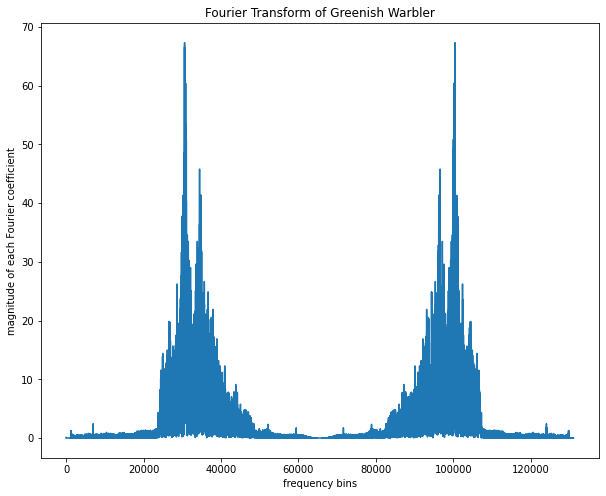

In [ ]:
plot_fourier(y_iw, "Greenish Warbler")

## Part D: Spectrograms to the Rescue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


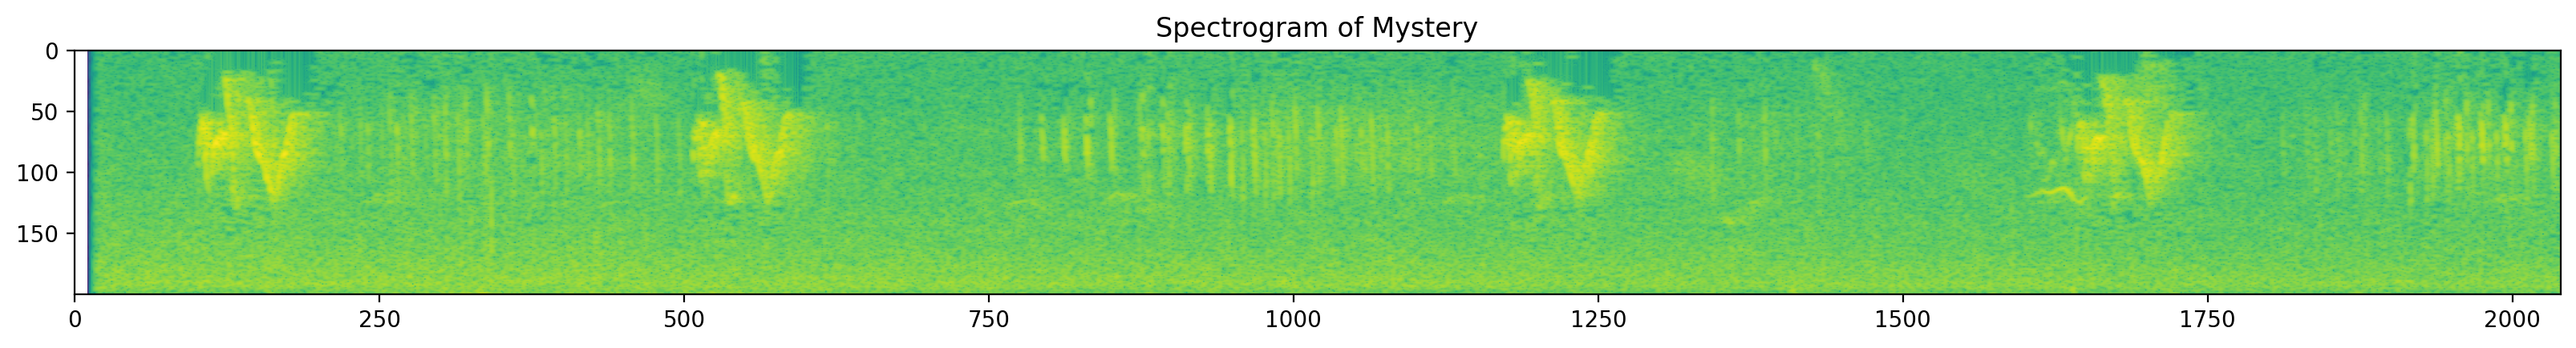

In [ ]:
spect_m = sliding_fourier_hamm(y_m, 64, 200)

figure(figsize=(20, 6), dpi=200)
plt.title("Spectrogram of Mystery")
plt.imshow(np.log(spect_m))

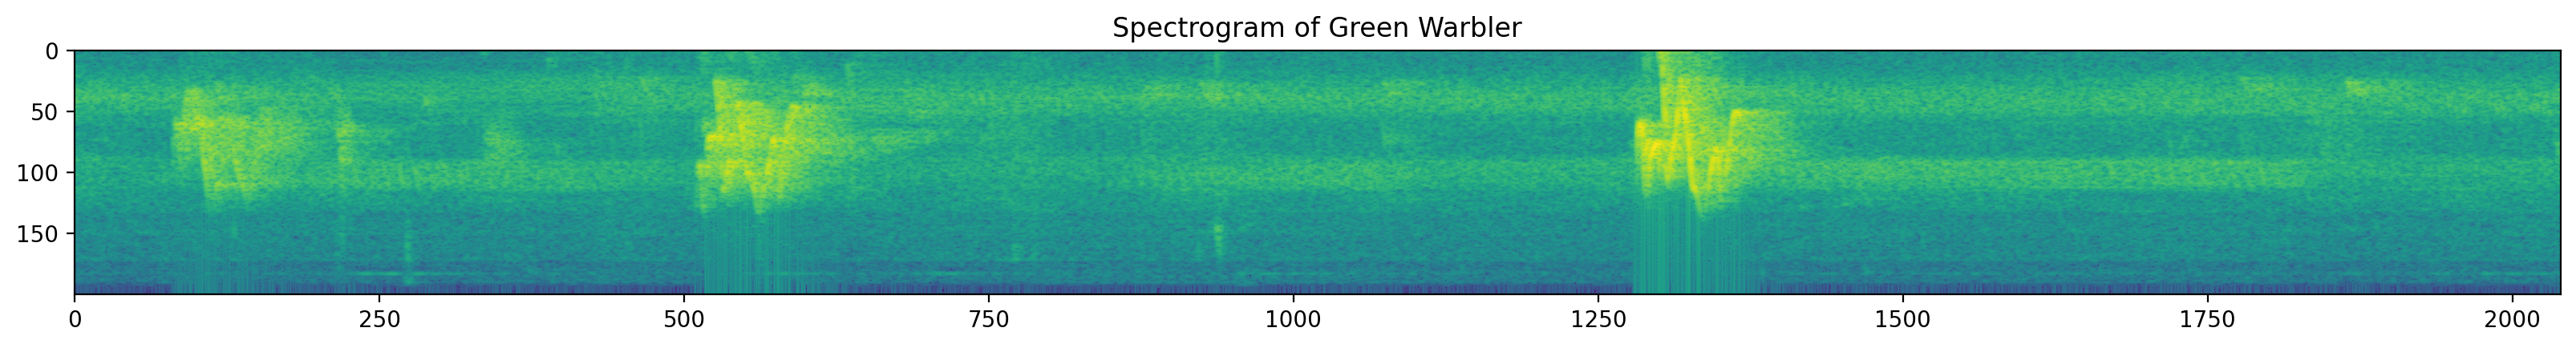

In [ ]:
spect_gw = sliding_fourier_hamm(y_gw, 64, 200)

figure(figsize=(20, 6), dpi=200)
plt.title("Spectrogram of Green Warbler")
plt.imshow(np.log(spect_gw))

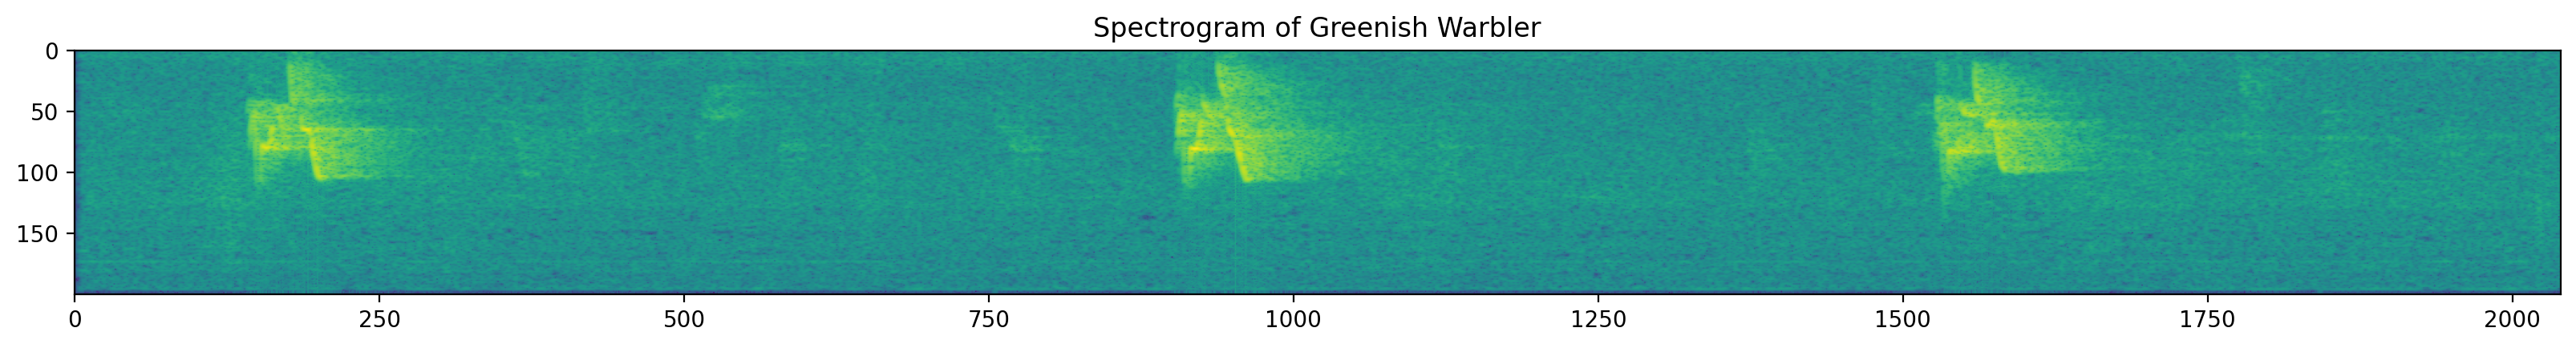

In [ ]:
spect_iw = sliding_fourier_hamm(y_iw, 64, 200)

figure(figsize=(20, 6), dpi=200)
plt.title("Spectrogram of Greenish Warbler")
plt.imshow(np.log(spect_iw))

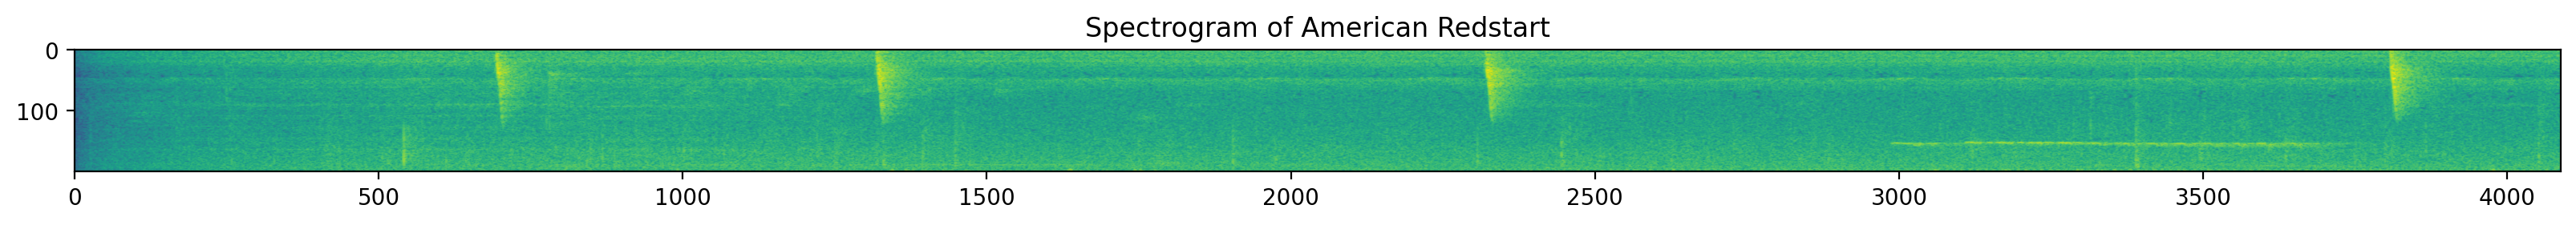

In [ ]:
spect_h = sliding_fourier_hamm(y_h, 64, 200)

figure(figsize=(20, 6), dpi=200)
plt.title("Spectrogram of American Redstart")
plt.imshow(np.log(spect_h))